# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

,debt,debt_in_group,grouped_by_children
children,,,
0,0.075438,1063,14091
1,0.092346,444,4808
2,0.094542,194,2052
3,0.081818,27,330
4,0.097561,4,41
5,0.000000,0,9


<AxesSubplot:xlabel='children', ylabel='debt'>

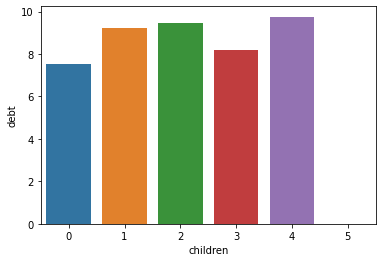

In [22]:
data_pivot_children = pd.pivot_table(data, index=['children'], values='debt') # создание сводной таблицы сгруппированной по индексу 'children' и выводом отношения должников к общему количеству людей в группах (не в %, отношение!)

data_pivot_children['debt_in_group'] = list(data.groupby('children')['debt'].sum()) # добавление столбца 'debt_in_group' с количеством должников в каждой группе
data_pivot_children['grouped_by_children'] = list(data.groupby('children')['children'].count()) # добавление столбца 'grouped_by_children' с общим количеством людей в группах

display(data_pivot_children) # Вывод на экран таблицы с полученными данными

import seaborn # импорт библиотеки seaborn для построения столбчатой диаграммы
seaborn.barplot(data=data_pivot_children, x=data_pivot_children.index, y=data_pivot_children['debt'] * 100) # построение диаграммы, ось x=количество детей, ось y=процент должников.


**Вывод:** На первый взгляд можно предположить, что количество детей прямо влияет на количество возвратов в срок: чем больше детей, тем меньше людей не возвращант кредиты. Об этом можно предположить, исходя из debt_children.
Но на деле, это не совсем так. Беря во внимание количество людей в группах people_in_group_child (а именно тот факт, что чем меньше в группе детей, тем больше эта группа), мы можем посчитать процент должников в каждой группе percent_debt.
Исходя из полученных результатов, можно сделать вывод о том, что в процентном отношении нет прямой связи между количеством детей и возвратом кредита в срок.
То, что задержек по выплатам в группе с 5 детьми нет, может говорить о том, что эта группа слишком маленькая (9 человек) для статистики.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,debt,debt_in_family,grouped_by_family
family_status,,,
Не женат / не замужем,0.097639,273,2796
в разводе,0.070648,84,1189
вдовец / вдова,0.066246,63,951
гражданский брак,0.093130,385,4134
женат / замужем,0.075606,927,12261


<AxesSubplot:xlabel='family_status', ylabel='debt'>

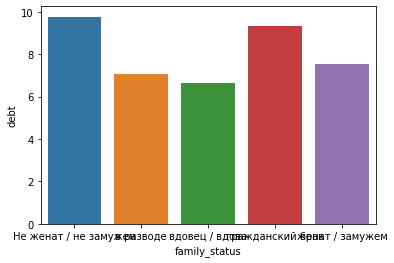

In [23]:
data_pivot_family = pd.pivot_table(data, index=['family_status'], values='debt') # создание сводной таблицы сгруппированной по индексу 'family_status' и выводом отношения должников к общему количеству людей в группах (не в %, а отношение!)

data_pivot_family['debt_in_family'] = list(data.groupby('family_status')['debt'].sum()) # добавление столбца 'debt_in_family' с количеством должников в каждой группе
data_pivot_family['grouped_by_family'] = list(data.groupby('family_status')['family_status'].count()) # добавление столбца 'grouped_by_family' с общим количеством людей в группах

display(data_pivot_family) # Вывод на экран таблицы с полученными данными

seaborn.barplot(data=data_pivot_family, x=data_pivot_family.index, y=data_pivot_family['debt'] * 100) # построение диаграммы, ось x=семейное положение, ось y=процент должников.

На первый взгляд, прямой связи между семейным положением и возвратом кредита в срок нет. Люди замужем/женатые и в гражданском браке имеют достаточно высокий процент должников, но в то же время самый большой процент должников имеют незамужние/неженатые люди. 

Если предположить, что одинокие люди имеют высокий процент должников, то можно обратить внимание, что вдовцы/вдовы и разведенные люди имеют наименьший процент долга. 

Можно только предположить, что люди, которые когда-либо закрепляли свой брак юридически (а это: женатые/замужние, разведенные и вдовы/вдовцы) имеют меньший процент должников, в отличие от групп людей, которые юридически не скрепляли отношения (группы: гражданский брак и не замужем/не женат).

Имеет смысл сгруппировать данные таким образом и посмотреть результат: 
- первая группа - люди, которые когда-либо закрепляли свой брак юридически,
- вторая группа - люди, которые юридически не скрепляли отношения.

,debt,debt_in_status,grouped_by_status
status,,,
illegal_status,0.094949,658,6930
legal_status,0.074578,1074,14401


<AxesSubplot:xlabel='status', ylabel='debt'>

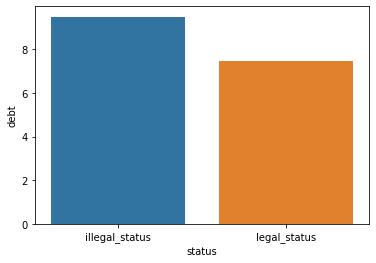

In [24]:
def status(f): # Создаем функцию
    for i in data['family_status']: # которая перебирает каждое значение в столбце 'family_status'
        if (f['family_status'] == 'Не женат / не замужем') | (f['family_status'] == 'гражданский брак'): # если значение в столбце удовлетворяет условию
            return 'illegal_status' # то возвращаем значение функции 'illegal_status'
        return 'legal_status' # иначе возвращаем значение функции 'legal_status'

data['status'] = data.apply(status, axis=1) # добавляем столбец с новым статусом (с результатами, полученными из функции)

data_pivot_status = pd.pivot_table(data, index=['status'], values='debt') # создание сводной таблицы сгруппированной по индексу 'status' и выводом отношения должников к общему количеству людей в группах (не в %, а отношение!)

data_pivot_status['debt_in_status'] = list(data.groupby('status')['debt'].sum()) # добавление столбца 'debt_in_status' с количеством должников в каждой группе
data_pivot_status['grouped_by_status'] = list(data.groupby('status')['status'].count()) # добавление столбца 'grouped_by_status' с общим количеством людей в группах

display(data_pivot_status) # Вывод на экран таблицы с полученными данными

seaborn.barplot(data=data_pivot_status, x=data_pivot_status.index, y=data_pivot_status['debt'] * 100) # построение диаграммы, ось x=статус, ось y=процент должников.

**Вывод:** Мы предположили, что процент должников может отличаться для людей, находящихся в группе когда-либо закреплявших свой брак юридически и не закреплявших отношения. 
Исходя из полученных результатов по второй части анализа, можно сделать вывод, что гипотеза оказалась верна: люди с легальным статусом с меньшей долей вероятности являются должниками.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,debt,debt_in_category,grouped_by_category
total_income_category,,,
A,0.080000,2,25
B,0.070602,354,5014
C,0.084982,1353,15921
D,0.060172,21,349
E,0.090909,2,22


<AxesSubplot:xlabel='total_income_category', ylabel='debt'>

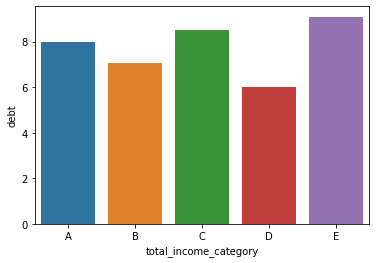

In [25]:
data_pivot_income = pd.pivot_table(data, index=['total_income_category'], values='debt') # создание сводной таблицы сгруппированной по индексу 'total_income_category' и выводом отношения должников к общему количеству людей в группах (не в %, а отношение!)

data_pivot_income['debt_in_category'] = list(data.groupby('total_income_category')['debt'].sum()) # добавление столбца 'debt_in_category' с количеством должников в каждой группе
data_pivot_income['grouped_by_category'] = list(data.groupby('total_income_category')['total_income_category'].count()) # добавление столбца 'grouped_by_category' с общим количеством людей в группах

display(data_pivot_income) # Вывод на экран таблицы с полученными данными

seaborn.barplot(data=data_pivot_income, x=data_pivot_income.index, y=data_pivot_income['debt'] * 100) # построение диаграммы, ось x=семейное положение, ось y=процент должников.

Из полученных данных нельзя сказать, есть ли взаимосвязь между уровнем дохода и возвратом кредитов в срок. Нужно продолжать исследование.

Предположим, что уровень образования может влиять либо на уровень дохода, либо на свойство возвращать кредиты в срок.

,debt,debt_education,grouped_by_education,education_median_salary
education,,,,
высшее,0.053185,278,5227,171529.0
начальное,0.109929,31,282,118941.5
неоконченное высшее,0.091768,68,741,156025.0
среднее,0.089884,1355,15075,141671.0
ученая степень,0.000000,0,6,157259.5


<AxesSubplot:xlabel='education', ylabel='debt'>

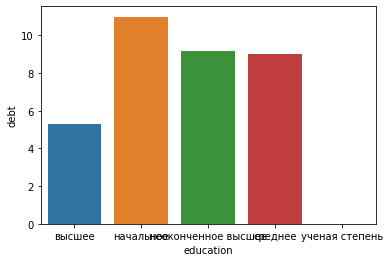

In [26]:
data_pivot_group_e = pd.pivot_table(data, index=['education'], values='debt') # создание сводной таблицы сгруппированной по индексу 'education' и выводом отношения должников к общему количеству людей в группах (не в %, а отношение!)

data_pivot_group_e['debt_education'] = list(data.groupby('education')['debt'].sum()) # добавление столбца 'debt_education' с количеством должников в каждой группе
data_pivot_group_e['grouped_by_education'] = list(data.groupby('education')['education'].count()) # добавление столбца 'grouped_by_education' с общим количеством людей в группах
data_pivot_group_e['education_median_salary'] = list(data.groupby('education')['total_income'].median()) # добавление столбца 'education_median_salary' с общим количеством людей в группах

display(data_pivot_group_e) # Вывод сводной таблицы

seaborn.barplot(data=data_pivot_group_e, x=data_pivot_group_e.index, y=data_pivot_group_e['debt'] * 100) # построение диаграммы, ось x=уровень образования, ось y=процент должников.

<AxesSubplot:xlabel='education_median_salary', ylabel='debt'>

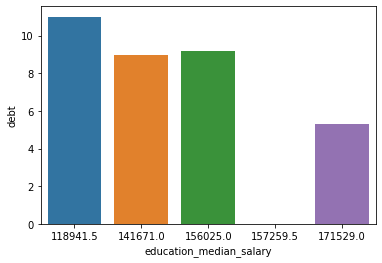

In [27]:
seaborn.barplot(data=data_pivot_group_e, x=data_pivot_group_e['education_median_salary'], y=data_pivot_group_e['debt'] * 100) # построение диаграммы, ось x=доход в группе по образованию, ось y=процент должников.

**Вывод:** Как видно из диаграмм, процент должников зависит не только от уровня дохода, но и от уровня образования. Так, наибольший процент должников можно увидеть в категории наименьшего дохода вкупе с начальным образованием. Высшее образование и ученая степень имеют наивысшие значения заработных плат, и наименьший процент должников при такой группировке. 

*То, что должников нет среди людей с ученой степенью не говорит о том, что они не могут быть должниками, просто в данном случае выборка по этой группе недостаточна.*

Можно сделать вывод о том, что на возврат кредитов в срок влияет как уровень дохода, так и уровень образования человека: 

**Выше уровень образования -> Выше уровень дохода -> Меньший процент должников.**

Почему такой вывод оказался неприменим в первом случае?

Я думаю, для этого есть несколько факторов:

- Выборка тем точнее, чем больше в ней данных для анализа (в первом случае в двух крайних категориях было слишком мало людей для анализа, во втором случае недостаток был только в одной категории).
- Чем больше общих черт/факторов можно вычленить для группировки, тем точнее будет результат. 
Так, в первом случае был расчет только исходя из достатка человека, без привязки к каким-либо социальным группам. В таких данных может быть много аномалий. Например, безработный человек без образования получил наследство - это увеличивает его шансы попасть, например, в категорию А, что будет нетипично для этой категории. Или пенсионер - доктор наук, у которого не очень большая пенсия, стремится попасть в группу Е, несмотря на свой уровень образования. Следовательно, собрав людей по какому-либо общему социальному признаку (в данном случае - это было образование), а затем посчитав для каждой категории медианный доход, мы избавились от таких искажений, и получили правдоподобную статистику.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,debt,debt_purpose,grouped_by_purpose
purpose_category,,,
операции с автомобилем,0.093480,400,4279
операции с недвижимостью,0.072551,780,10751
получение образования,0.092528,369,3988
проведение свадьбы,0.079118,183,2313


<AxesSubplot:xlabel='purpose_category', ylabel='debt'>

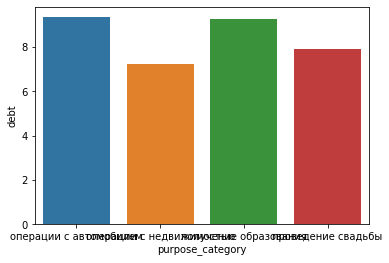

In [28]:
data_pivot_pur = pd.pivot_table(data, index=['purpose_category'], values='debt') # создание сводной таблицы сгруппированной по индексу 'family_status' и выводом отношения должников к общему количеству людей в группах (не в %, а отношение!)

data_pivot_pur['debt_purpose'] = list(data.groupby('purpose_category')['debt'].sum()) # добавление столбца 'debt_in_family' с количеством должников в каждой группе
data_pivot_pur['grouped_by_purpose'] = list(data.groupby('purpose_category')['purpose_category'].count()) # добавление столбца 'grouped_by_family' с общим количеством людей в группах

display(data_pivot_pur) # Вывод на экран таблицы с полученными данными

import seaborn # импорт библиотеки seaborn для построения столбчатой диаграммы
seaborn.barplot(data=data_pivot_pur, x=data_pivot_pur.index, y=data_pivot_pur['debt'] * 100) # построение диаграммы, ось x=семейное положение, ось y=процент должников.

**Вывод:** В результате расчета мы получили, что меньше всего задолженностей имеют люди, берущие кредит на недвижимость. Наибольший процент задолженностей для образования и на автомобиль.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
- Пропуск в данных может не являться пропуском. Это может быть нулевое значение (например, ноль дней стажа, если человек еще не работал официально). Это может быть отсутствие значения, даже нетипичное (например, отсутствие отчества у человека).
- Неуказанные данные не предоставлены пользователем/заявителем и т.д.
Например, для этого конкретного случая, имеется одинаковое количество пропусков в двух колонках 2174: days_employed (общий трудовой стаж в днях) и total_income (ежемесячный доход). Учитывая, что людей, не имеющих работы (и, возможно, никогда не имевших) и дохода, согласно данным из датасета, всего 4 (2 безработных, 1 в декрете и 1 студент), можно предположить, что люди сознательно не указали эти данные. Возможно, имеющие низкий доход или маленький стаж работы. Как мы выяснили в исследовании, это может помочь человеку получить одобрение, если его посчитают по медианным или средним значениям.
- Причиной появления пропусков может быть сбой
- Неправильный прием исходных данных или неправильная обработка данных (например, аналитик устраненил аномалии, но не заполнил ячейки данными)

In [29]:
display(data.groupby('income_type')['income_type'].count()) # Люди, сгруппированные по роду деятельности

income_type
безработный            2
в декрете              1
госслужащий         1451
компаньон           5047
пенсионер           3812
предприниматель        2
сотрудник          11015
студент                1
Name: income_type, dtype: int64

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 

Ответом может служить анекдот:

Три аналитика-экономиста на охоте. Видят большого оленя. Один целится, стреляет, промахнулся — на метр влево. Второй — целится, стреляет, не попал — на метр вправо. Третий аналитик, не стреляя: "Ну, в среднем мы его убили!"

Таким образом, при подсчете средней заработной платы, можно прийти к выводу о том, что люди получают намного больше, чем на самом деле. Т.к. в реалиях мира имеется очень большое количество людей с низким достатком и людей со средним достатком, и есть очень ограниченное количество людей с несоизмеримо большими достатками. Так, включая в расчет таких людей, средняя зарплата оказывается намного выше реальных доходов. Чтобы с этим бороться, нужно либо исключать эти данные из расчета (что может негативно сказаться на всем анализе), либо искать медианные значения, которые, если говорить самыми простыми словами, как раз убирают такие аномалии (в данном контексте), но при этом с этими данными все так же можно работать.

### Шаг 4: общий вывод.

Напишите ваш общий вывод.

В данном проекте были проведены исследования влияния различных фактов, различных исходных данных на возврат кредита в срок.

Расчитано влияние количества детей, семейного положения, достатка различных групп людей на возврат.

Выводы:
- Количество детей не влияет на процент должников. Несмотря на то, что в абсолютных показателях это так (чем больше детей, тем меньше должников), в процентном отношении эта гипотеза не подтвердилась (т.к. людей  с меньшим количеством детей всегда больше, а следовательно, в абсолютных значениях, больше и должников).
- Имеется связь между семейным положением и процент должников. Так, люди, которые когда-либо были в официальном браке имеют меньший процент должников, чем люди, которые никогда не были в официальном браке.
- Процент должников зависит от уровня дохода и образования. Исходя из полученных данных, более высокий уровень образования приводит к более высокому уровню доходов по медиане. При этом, чем выше уровень образования, тем меньше процент должников. Следовательно, чем выше доход в категории, тем меньший процент должников в этой категории.
- Наименьший процент должников находится в категории "операции с недвижимостью".